# Task for the Data Analyst Candidates

### 1. Data Cleaning and Preparation

In [1]:
# Import Dataset
import pandas as pd

data = pd.read_csv("Student Performance Dataset.csv")
data

,Student ID,Name,Gender,Age,Course,Department,Year of Study,GPA,Credits Earned,Attendance(%),Scholarship,Exam Score(%),Graduation Status
0,S001,John Mwangi,Male,21,Computer Science,ICT,3rd,3.8,90,85,Yes,78,Pending
1,S002,Mary Achieng,Female,22,Business Management,Business,4th,3.5,120,90,No,82,Pending
2,S003,Kevin Otieno,Male,23,Data Science,ICT,4th,3.9,110,88,Yes,91,Pending
3,S004,Sarah Wanjiru,Female,20,Accounting,Finance,2nd,3.2,60,75,No,69,Pending
4,S005,Brian Kamau,Male,21,Software Engineering,ICT,3rd,2.9,80,70,No,65,Pending
5,S006,Lucy Mutua,Female,22,Human Resource,Business,4th,3.6,100,95,Yes,88,Pending
6,S007,James Ndungu,Male,20,Eletrical Engineering,Engineering,2nd,3.0,75,80,No,71,Pending
7,S008,Faith Kiprono,Female,23,Cybersecurity,ICT,4th,3.7,115,85,Yes,87,Pending
8,S009,Peter Ouma,Male,22,Finance,Finance,4th,3.1,98,76,No,73,Pending
9,S010,Cythia Muthoni,Female,21,Artificial Intelligence,ICT,3rd,3.4,85,88,Yes,80,Pending


In [20]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         10 non-null     object 
 1   Name               10 non-null     object 
 2   Gender             10 non-null     object 
 3   Age                10 non-null     int64  
 4   Course             10 non-null     object 
 5   Department         10 non-null     object 
 6   Year of Study      10 non-null     object 
 7   GPA                10 non-null     float64
 8   Credits Earned     10 non-null     int64  
 9   Attendance(%)      10 non-null     int64  
 10  Scholarship        10 non-null     object 
 11  Exam Score(%)      10 non-null     int64  
 12  Graduation Status  10 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ KB


In [2]:
# checking for missing values
data.isnull().sum()

Student ID           0
Name                 0
Gender               0
Age                  0
Course               0
Department           0
Year of Study        0
GPA                  0
Credits Earned       0
Attendance(%)        0
Scholarship          0
Exam Score(%)        0
Graduation Status    0
dtype: int64

- No Missing values found

In [3]:
# Checking for duplicates
data.duplicated().sum()

0

- No duplicates found

In [4]:
data['Graduation Status']

0    Pending
1    Pending
2    Pending
3    Pending
4    Pending
5    Pending
6    Pending
7    Pending
8    Pending
9    Pending
Name: Graduation Status, dtype: object

### 2. Sorting and Filtering

(a) Sort Students by GPA in descending Order

In [5]:
# Grouping Students with their corresponding GPAs
data.groupby('Name').agg({"GPA":"sum"}).sort_values('GPA', ascending=False)

,GPA
Name,
Kevin Otieno,3.9
John Mwangi,3.8
Faith Kiprono,3.7
Lucy Mutua,3.6
Mary Achieng,3.5
Cythia Muthoni,3.4
Sarah Wanjiru,3.2
Peter Ouma,3.1
James Ndungu,3.0


- Kevin Otieno has the best GPA score of `3.9`. Kudos Kevin!

(b) 4th Year and GPA of > 3.5

In [6]:
fourth_year_high_gpa = data[data['GPA'] > 3.5]
fourth_year_high_gpa = fourth_year_high_gpa[fourth_year_high_gpa['Year of Study'] == '4th'] 
fourth_year_high_gpa 

,Student ID,Name,Gender,Age,Course,Department,Year of Study,GPA,Credits Earned,Attendance(%),Scholarship,Exam Score(%),Graduation Status
2,S003,Kevin Otieno,Male,23,Data Science,ICT,4th,3.9,110,88,Yes,91,Pending
5,S006,Lucy Mutua,Female,22,Human Resource,Business,4th,3.6,100,95,Yes,88,Pending
7,S008,Faith Kiprono,Female,23,Cybersecurity,ICT,4th,3.7,115,85,Yes,87,Pending


In [7]:
print(f"4th yr students with GPA > 3.5 include: {list(fourth_year_high_gpa['Name'])}")

4th yr students with GPA > 3.5 include: ['Kevin Otieno', 'Lucy Mutua', 'Faith Kiprono']


(c) Attendance below 80% and GPA below 3.0

In [8]:
below_80att_3gpa = data[data['Attendance(%)'] < 80]
below_80att_3gpa_name = below_80att_3gpa[below_80att_3gpa['GPA'] < 3.0 ]
below_80att_3gpa_name

,Student ID,Name,Gender,Age,Course,Department,Year of Study,GPA,Credits Earned,Attendance(%),Scholarship,Exam Score(%),Graduation Status
4,S005,Brian Kamau,Male,21,Software Engineering,ICT,3rd,2.9,80,70,No,65,Pending


In [21]:
print(f"Student with Attendance below 80% and GPA below 3: {list(below_80att_3gpa_name['Name'])}")

Student with Attendance below 80% and GPA below 3: ['Brian Kamau']


### 3. Statistical Analysis

(a) Average GPA of all students

In [10]:
import numpy as np
GPA_Mean = np.mean(data['GPA'])
print(f"AVERAGE GPA = {GPA_Mean}")

AVERAGE GPA = 3.41


(b) Department with the highest average GPA

In [11]:
dep_high_GPA = data.groupby('Department').agg({"GPA":"mean"})
dep_high_GPA


,GPA
Department,
Business,3.55
Engineering,3.00
Finance,3.15
ICT,3.54


In [12]:
dep_high_GPA.sort_values('GPA', ascending=False)

,GPA
Department,
Business,3.55
ICT,3.54
Finance,3.15
Engineering,3.00


- From the above analysis, the `Business Department` has the highest average GPA with a splendid mean of `3.55`. Unfortunately, the Engineering department is lagging behind with a mean of 3.00

(c) Scholarship Vs non-scholarship Students

In [13]:
data['Scholarship'].value_counts()

Scholarship
Yes    5
No     5
Name: count, dtype: int64

- Five students have Scholarships and the remainder five have no Scholarship Award

### 4. Predictive Insights 

(a) GPA > 3.7 AND Attendance > 85

In [14]:
excellent_student = data[data['GPA'] > 3.7]
excellent_student_name = excellent_student[excellent_student['Attendance(%)'] > 85]
excellent_student_name

,Student ID,Name,Gender,Age,Course,Department,Year of Study,GPA,Credits Earned,Attendance(%),Scholarship,Exam Score(%),Graduation Status
2,S003,Kevin Otieno,Male,23,Data Science,ICT,4th,3.9,110,88,Yes,91,Pending


In [22]:
print(f"Most likely to graduate with honors is: {list(excellent_student_name['Name'])}")

Most likely to graduate with honors is: ['Kevin Otieno']


(b) Performing Course

In [16]:
performing_course = data[data['GPA'] > 3.5]
performing_course

,Student ID,Name,Gender,Age,Course,Department,Year of Study,GPA,Credits Earned,Attendance(%),Scholarship,Exam Score(%),Graduation Status
0,S001,John Mwangi,Male,21,Computer Science,ICT,3rd,3.8,90,85,Yes,78,Pending
2,S003,Kevin Otieno,Male,23,Data Science,ICT,4th,3.9,110,88,Yes,91,Pending
5,S006,Lucy Mutua,Female,22,Human Resource,Business,4th,3.6,100,95,Yes,88,Pending
7,S008,Faith Kiprono,Female,23,Cybersecurity,ICT,4th,3.7,115,85,Yes,87,Pending


In [17]:
print(f"The Course list Include the following: {list(performing_course['Course'])}")

The Course list Include the following: ['Computer Science', 'Data Science', 'Human Resource', 'Cybersecurity']


(c) Visual reprentation to show the distribution of GPAs Across different Departments.

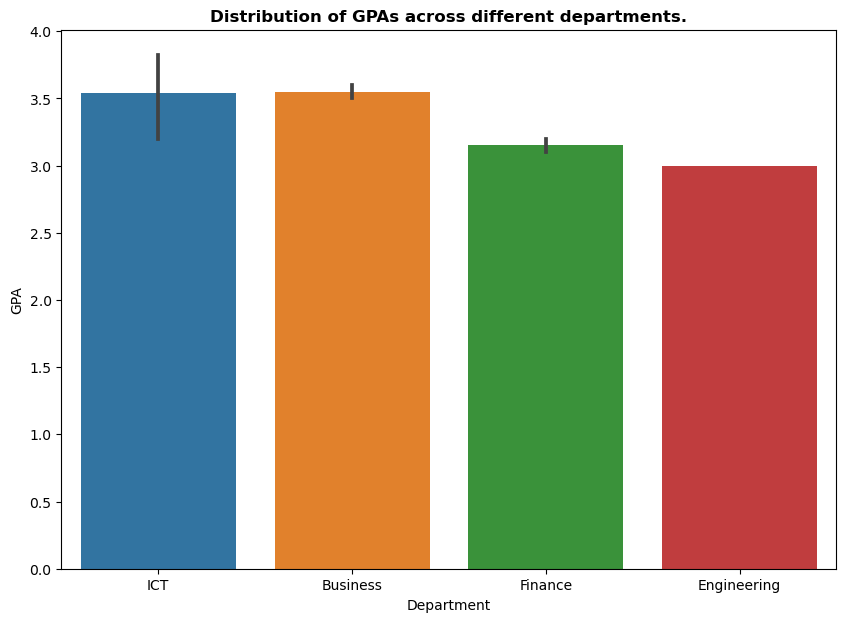

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7)) 
sns.barplot(data = data, x='Department', y='GPA', ) 
plt.title('Distribution of GPAs across different departments.', weight = 'bold') 
plt.xlabel('Department') 
plt.ylabel('GPA') 
plt.show();

(d) Correlation between exam scores and GPA

Correlation coefficient between Exam scores and GPA = 0.88


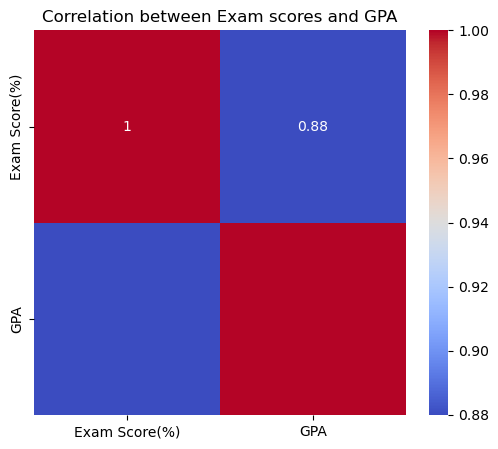

In [19]:
# Calculate correlation coefficient
correlation = data[['Exam Score(%)', 'GPA']].corr().iloc[0, 1]
print(f"Correlation coefficient between Exam scores and GPA = {correlation:.2f}")

# correlation matrix
correlation_matrix = data[['Exam Score(%)', 'GPA']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)

# Add title
plt.title('Correlation between Exam scores and GPA')
plt.show();

- Definetly YES, students with high exam scores tend to have high GPAs. The Correlation coefficient value between Exam scores and GPA = 0.88
  which is closer to +1, hence a STRONG correlation!

### Gender-Based Performance

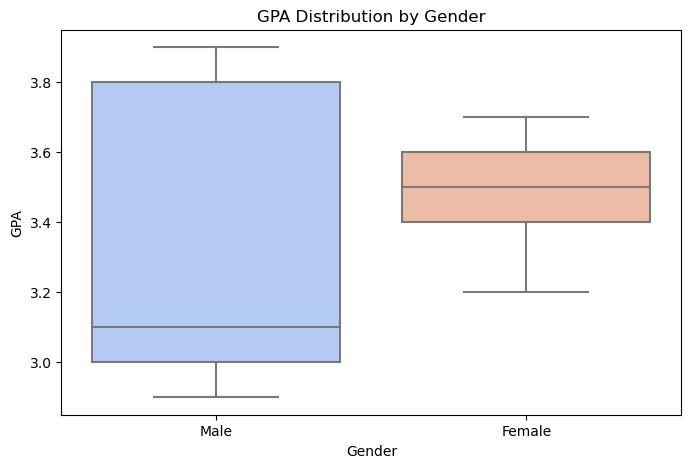

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Gender', y='GPA', palette='coolwarm')
plt.title('GPA Distribution by Gender')
plt.show();

### Regression Plot for Exam Score vs. GPA
- linear relationship between Exam Score and GPA using Seaborn regression plot.

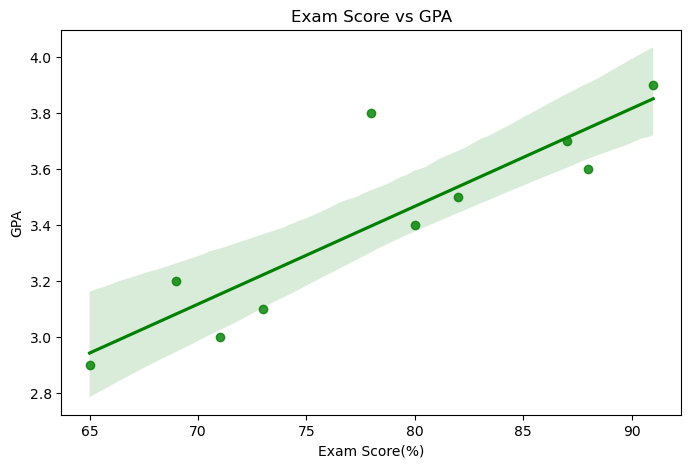

In [24]:
plt.figure(figsize=(8, 5))
sns.regplot(data=data, x='Exam Score(%)', y='GPA', color='green')
plt.title('Exam Score vs GPA')
plt.show();

### Scholarship Impact on Exam Scores
- Do students with scholarships perform better in exams?
Box plot to compare Exam Scores of Scholarship vs. Non-Scholarship students.


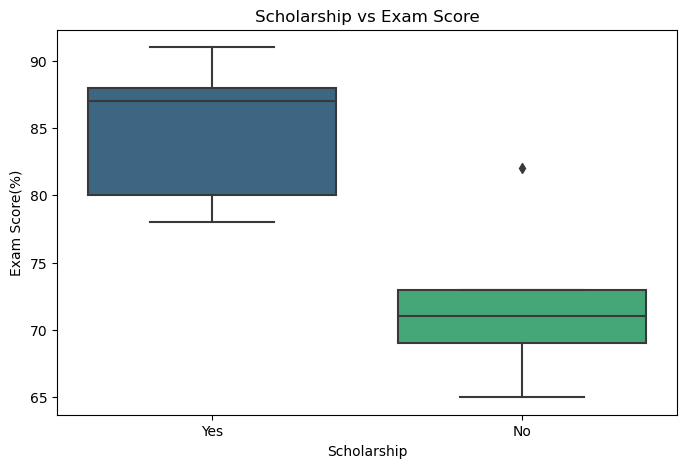

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Scholarship', y='Exam Score(%)', palette='viridis')
plt.title('Scholarship vs Exam Score')
plt.show()
